# Covid-19

### source : humdata.org
### source file : https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

In [77]:
#import covid19_tools

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from datetime import datetime

%matplotlib inline

In [78]:
data_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv", delimiter=",", parse_dates=True, encoding="utf8")
data_death = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv", delimiter=",", parse_dates=True, encoding="utf8")
data_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv", delimiter=",", parse_dates=True, encoding="utf8")
datasets = {
    'confirmed': data_confirmed,
    'death': data_death,
    'recovered': data_recovered
}

In [79]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,989,989,989,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,400,400,410,410,411,413,414,414,418,418
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,294,294,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,102


In [80]:
data_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,4,4,5,7,8,8,8,8,8,8
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [81]:
data_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,712,744,792,821,868,873,917,936,956,970
1,Beijing,Mainland China,40.1824,116.4142,0,0,1,2,2,2,...,215,235,248,257,271,276,282,288,297,297
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,372,384,401,422,438,450,469,490,502,512
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,199,218,228,235,243,247,255,260,270,277
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,80,81,81,82,82,84,85,86,87,87


## Covid-19's evolution comparaison

In [82]:
data_confirmed.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20'],
      dtype='object')

In [83]:
def getCountryData(country):
    """
    Structure of return : 
    
    countryDict = {
        'confirmed' = {
            datetime(...): nb1,
            datatime(...): nb2
        },
        'death' = {
            datetime(...): nb1,
            datatime(...): nb2
        },
        'recovered' = {
            datetime(...): nb1,
            datatime(...): nb2
        },
    }
    """
    countryDict = {}
    for d_name, d_data in datasets.items():
        countryDict[d_name] = {}
        country_data = d_data.loc[d_data['Country/Region'] == country]
        for column in country_data.columns[4:]:
            countryDict[d_name][datetime.strptime(column, '%m/%d/%y')] = country_data[column].values[0]
    return countryDict

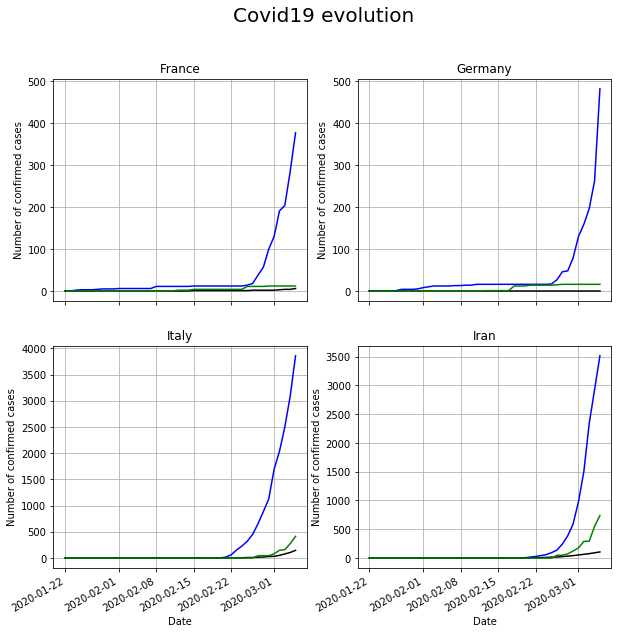

In [84]:
# plotting France's evolution

countries = ['France', 'Germany', 'Italy', 'Iran']

dicts = [
    getCountryData('France'),
    getCountryData('Germany'),
    getCountryData('Italy'),
    getCountryData('Iran')
]

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Covid19 evolution', fontsize=20)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

axs = []
axs.append(fig.add_subplot(spec[0, 0]))
axs.append(fig.add_subplot(spec[0, 1], sharey=axs[-1]))
axs.append(fig.add_subplot(spec[1, 0], sharex=axs[-1]))
axs.append(fig.add_subplot(spec[1, 1], sharex=axs[-1]))

for d, ax, c in zip(dicts, axs, countries):
    ax.plot(list(d['confirmed'].keys()), list(d['confirmed'].values()), color='b')
    ax.plot(list(d['death'].keys()), list(d['death'].values()), color='k')
    ax.plot(list(d['recovered'].keys()), list(d['recovered'].values()), color='g')
    
    ax.set_title(c)
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of confirmed cases')
    ax.grid(True)

plt.gcf().autofmt_xdate()

## Mainland China analysis

In [85]:
mainland_china_confirmed = data_confirmed.groupby("Country/Region", as_index=False).agg(sum)
mainland_china_confirmed = mainland_china_confirmed.loc[mainland_china_confirmed['Country/Region'] == 'Mainland China']
mainland_china_confirmed

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
49,Mainland China,1035.61502,3457.83,547,639,916,1399,2062,2863,5494,...,77660,78065,78498,78824,79251,79826,80026,80151,80271,80422


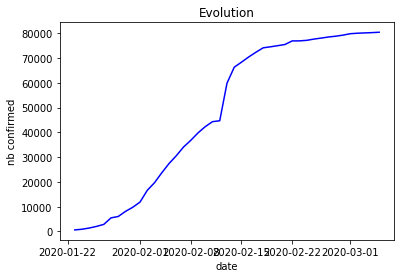

<Figure size 432x288 with 0 Axes>

In [86]:
country = 'Mainland China'
chinaDict = {
    'confirmed': {
        
    }
}
for column in mainland_china_confirmed.columns[4:]:
    chinaDict['confirmed'][datetime.strptime(column, '%m/%d/%y')] = mainland_china_confirmed[column].values[0]
    
fig, ax = plt.subplots()
x = np.arange(len(chinaDict['confirmed']))
ax.plot(list(chinaDict['confirmed'].keys()), list(chinaDict['confirmed'].values()), color='b')
ax.set(xlabel='date', ylabel='nb confirmed',
       title='Evolution')
plt.show()
plt.gcf().autofmt_xdate()

In [87]:
mainland_china_death = data_death.groupby("Country/Region", as_index=False).agg(sum)
mainland_china_death = mainland_china_death.loc[mainland_china_death['Country/Region'] == 'Mainland China']
mainland_china_death

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
49,Mainland China,1035.61502,3457.83,17,18,26,42,56,82,131,...,2663,2715,2744,2788,2835,2870,2912,2945,2981,3013


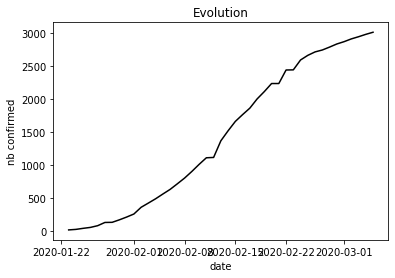

<Figure size 432x288 with 0 Axes>

In [88]:
country = 'Mainland China'
chinaDict['death'] = {}

for column in mainland_china_death.columns[4:]:
    chinaDict['death'][datetime.strptime(column, '%m/%d/%y')] = mainland_china_death[column].values[0]
    
fig, ax = plt.subplots()
x = np.arange(len(chinaDict['death']))
ax.plot(list(chinaDict['death'].keys()), list(chinaDict['death'].values()), color='k')
ax.set(xlabel='date', ylabel='nb confirmed',
       title='Evolution')
plt.show()
plt.gcf().autofmt_xdate()

In [89]:
mainland_china_recovered = data_recovered.groupby("Country/Region", as_index=False).agg(sum)
mainland_china_recovered = mainland_china_recovered.loc[mainland_china_recovered['Country/Region'] == 'Mainland China']
mainland_china_recovered

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
49,Mainland China,1035.61502,3457.83,28,30,36,39,49,58,101,...,27650,30053,32898,36291,39279,42118,44810,47404,49955,52240


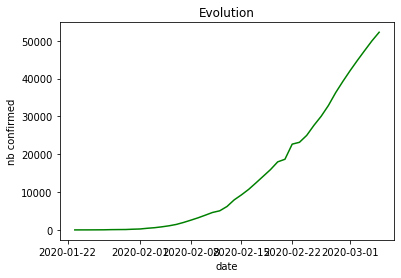

<Figure size 432x288 with 0 Axes>

In [90]:
country = 'Mainland China'
chinaDict['recovered'] = {}

for column in mainland_china_recovered.columns[4:]:
    chinaDict['recovered'][datetime.strptime(column, '%m/%d/%y')] = mainland_china_recovered[column].values[0]
    
fig, ax = plt.subplots()
x = np.arange(len(chinaDict['death']))
ax.plot(list(chinaDict['recovered'].keys()), list(chinaDict['recovered'].values()), color='g')
ax.set(xlabel='date', ylabel='nb confirmed',
       title='Evolution')
plt.show()
plt.gcf().autofmt_xdate()